<a href="https://colab.research.google.com/github/sahrul3114/Project-GDGOC/blob/main/P5_Prediksi_MPG_Mobil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Silahkan kerjakan Final Project mu disini ya ☺️🙏

# **Case : Prediksi MPG Mobil**

Seorang pengusaha di industri otomotif ingin memahami seberapa efisien konsumsi bahan
bakar mobil yang dijualnya. Ia menyadari bahwa efisiensi bahan bakar (MPG) menjadi
faktor penting bagi pelanggan dalam memilih mobil yang hemat dan ramah lingkungan.
Namun, dengan beragam spesifikasi seperti kapasitas mesin (displacement), tenaga mesin
(horsepower), dan berat mobil, sulit baginya memprediksi secara akurat konsumsi bahan
bakar setiap mobil hanya berdasarkan karakteristik fisiknya.

Sebagai seorang machine learning engineer, kamu dapat membantu pengusaha tersebut
memprediksi MPG (Miles Per Gallon) menggunakan linear regression. Dengan
memanfaatkan fitur-fitur seperti jumlah silinder, kapasitas mesin, tenaga mesin, berat
mobil, dan tahun pembuatan, model dapat memberikan estimasi konsumsi bahan bakar
untuk berbagai jenis mobil. Prediksi ini memungkinkan pengusaha membuat keputusan
yang lebih baik dalam menentukan model mana yang paling efisien atau memberikan
rekomendasi yang akurat kepada pelanggan berdasarkan kebutuhan mereka.

## **DATA PREPARATION**
### **Data Loading**

#### **1. Pengumpulan Data**

In [ ]:
import pandas as pd

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OgP6EIkroVkVpr3TwQwAFBVf-MyPDZHY' -O 'Automobiles.csv'

--2025-04-17 15:37:46--  https://docs.google.com/uc?export=download&id=1OgP6EIkroVkVpr3TwQwAFBVf-MyPDZHY
Resolving docs.google.com (docs.google.com)... 64.233.181.100, 64.233.181.101, 64.233.181.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.181.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1OgP6EIkroVkVpr3TwQwAFBVf-MyPDZHY&export=download [following]
--2025-04-17 15:37:46--  https://drive.usercontent.google.com/download?id=1OgP6EIkroVkVpr3TwQwAFBVf-MyPDZHY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19285 (19K) [application/octet-stream]
Saving to: ‘Automobiles.csv’

Automobiles.csv     100%[===================>]  18.83K  --.-KB/s    in 

In [ ]:
df = pd.read_csv("Automobiles.csv", encoding = 'utf-8')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


#### **2. Identifikasi setiap fitur/kolom**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [ ]:
df.dtypes

,0
name,object
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object


#### **3. Deskripsi data**

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#### **4. Adakah missing values?**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


Ya, terdapat 6 missing values pada kolom **horsepower**.

#### **5. Adakah outlier?**

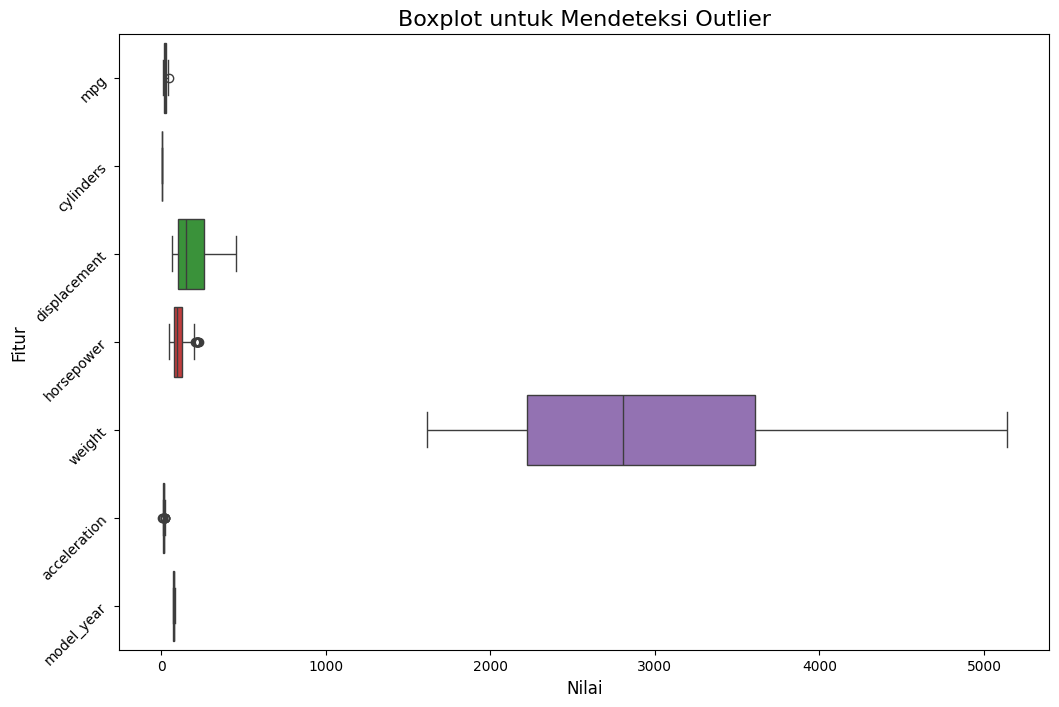

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['number']), ax=ax, orient="h")
ax.set_title("Boxplot untuk Mendeteksi Outlier", fontsize=16)
ax.set_xlabel("Nilai", fontsize=12)
ax.set_ylabel("Fitur", fontsize=12)
plt.yticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi boxplot, dapat disimpulkan bahwa terdapat outlier pada beberapa fitur dalam dataset.

#### **6. Adakah data duplikat?**

In [ ]:
data_duplikat = df.duplicated().sum()
print(f"Jumlah data yang duplikat: {data_duplikat}")

Jumlah data yang duplikat: 0


Tidak ada duplikat

#### **7. Univariate, Bivariate, & Multivariate Analysis**

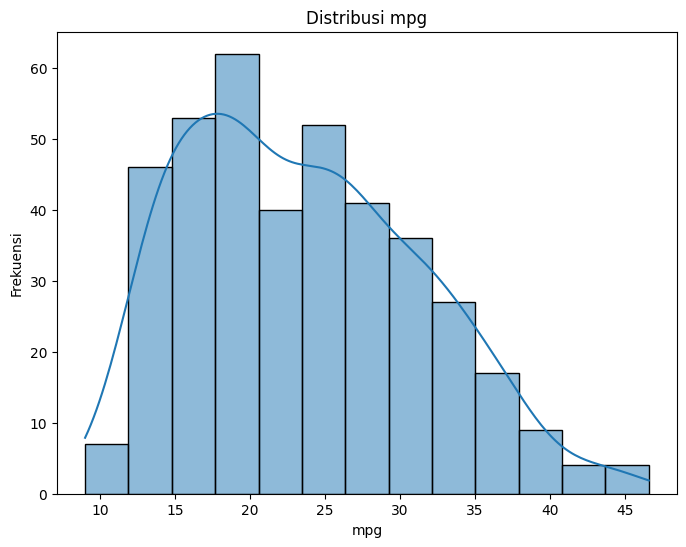

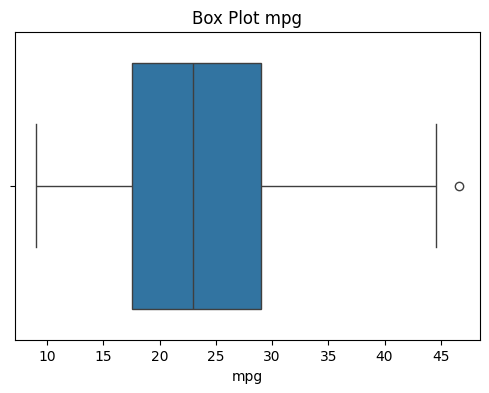

Deskripsi data mpg:
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64



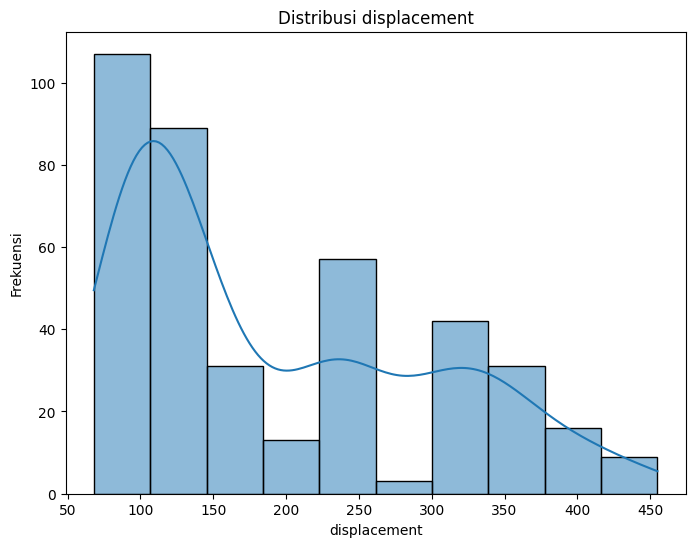

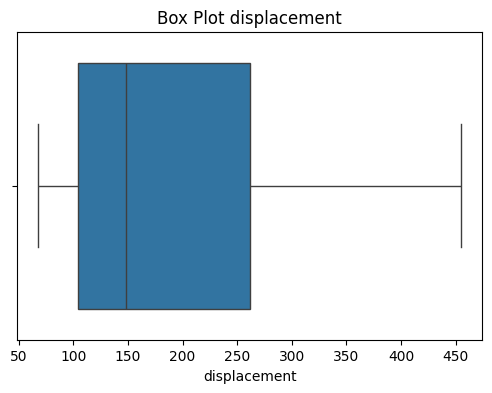

Deskripsi data displacement:
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64



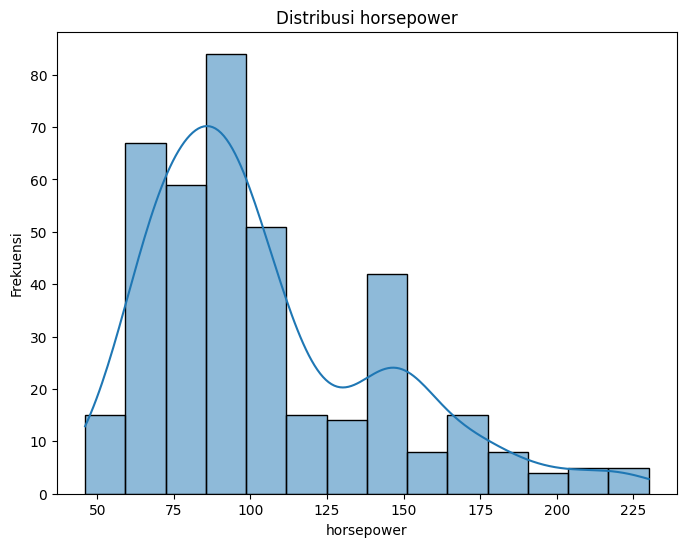

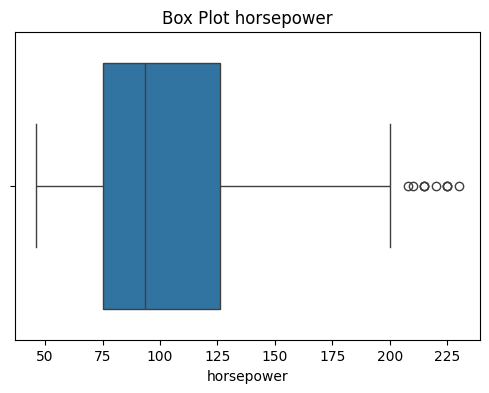

Deskripsi data horsepower:
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64



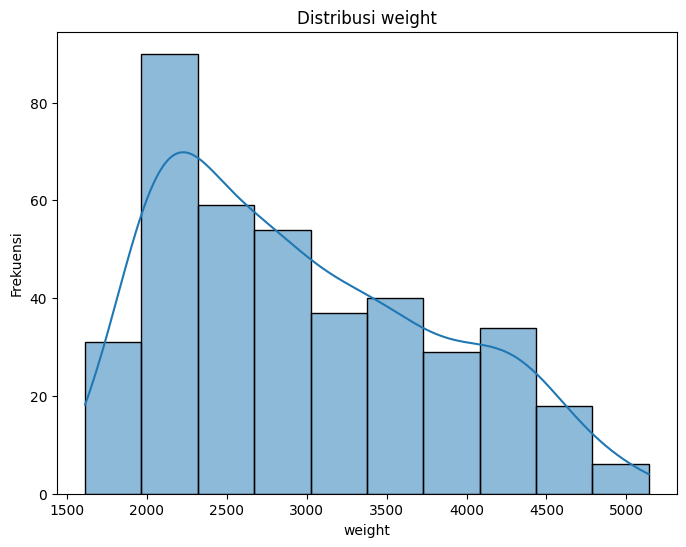

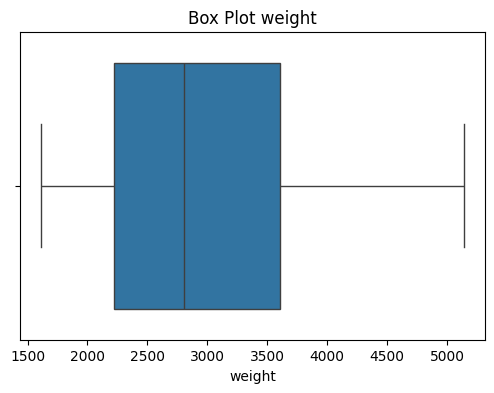

Deskripsi data weight:
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64



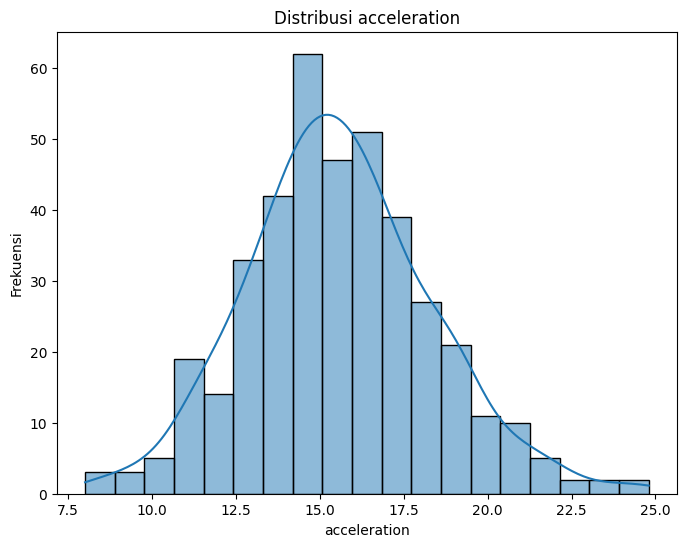

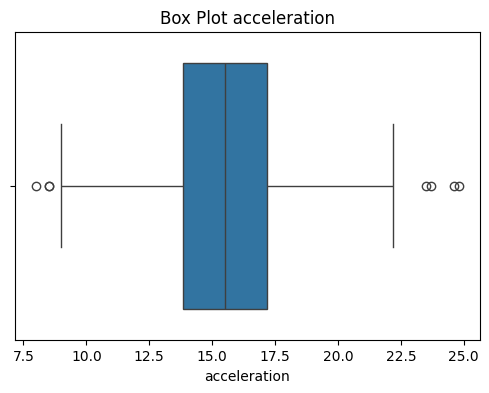

Deskripsi data acceleration:
count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64



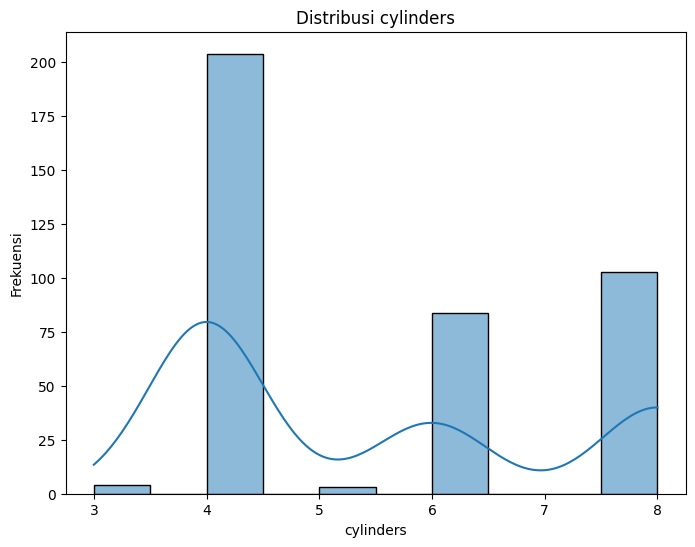

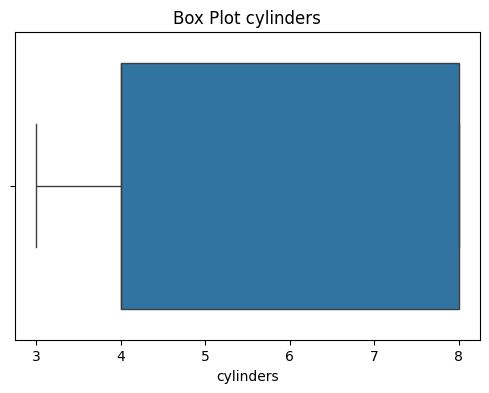

Deskripsi data cylinders:
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64



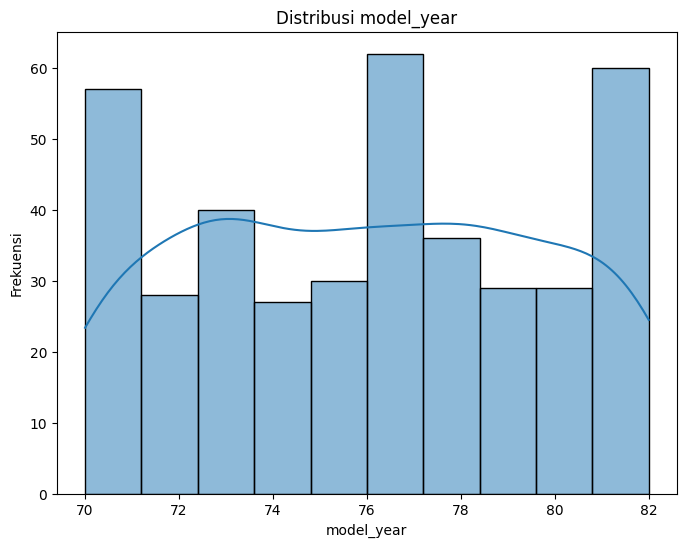

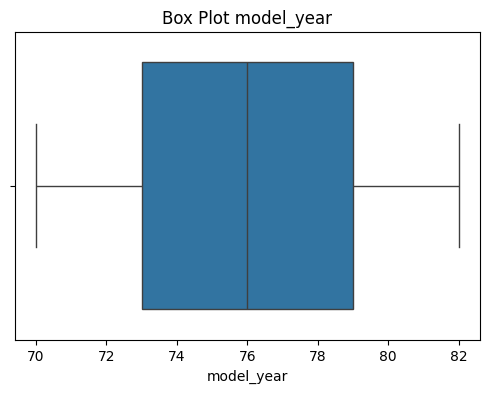

Deskripsi data model_year:
count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64



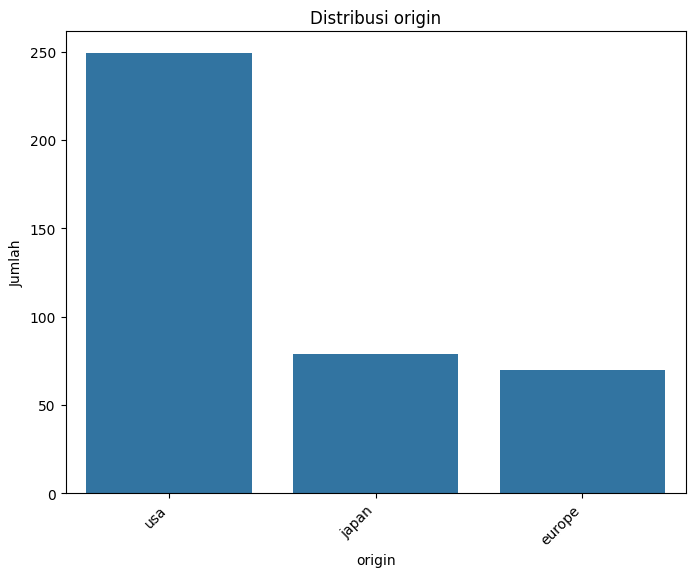

Jumlah Frekuensi origin:
origin
usa       249
japan      79
europe     70
Name: count, dtype: int64



In [ ]:
# Univariate Analysis untuk kolom numerik
kolom_numerik = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'model_year']

for column in kolom_numerik:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()
    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot {column}')
    plt.xlabel(column)
    plt.show()

    print(f'Deskripsi data {column}:\n{df[column].describe()}\n')

# Univarite Analysis untuk kolom kategorik
kolom_kategorik = ['origin']

for column in kolom_kategorik:
    # Countplot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column])
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print(f'Jumlah Frekuensi {column}:\n{df[column].value_counts()}\n')

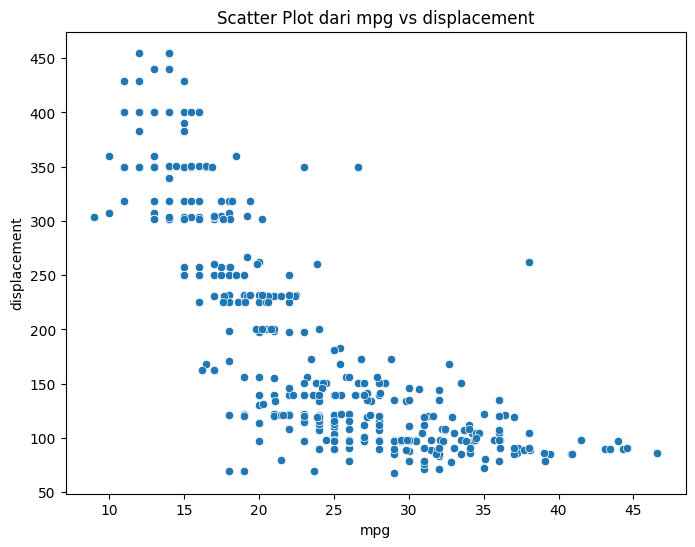

Korelasi antara mpg dan displacement: -0.804202824805898



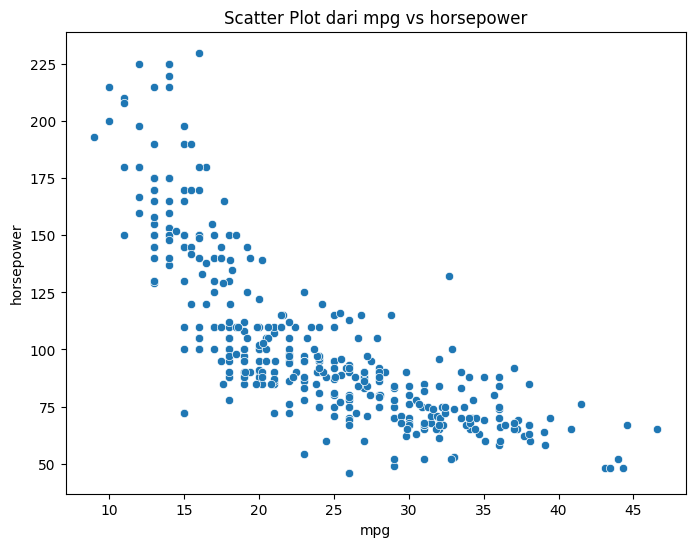

Korelasi antara mpg dan horsepower: -0.7784267838977756



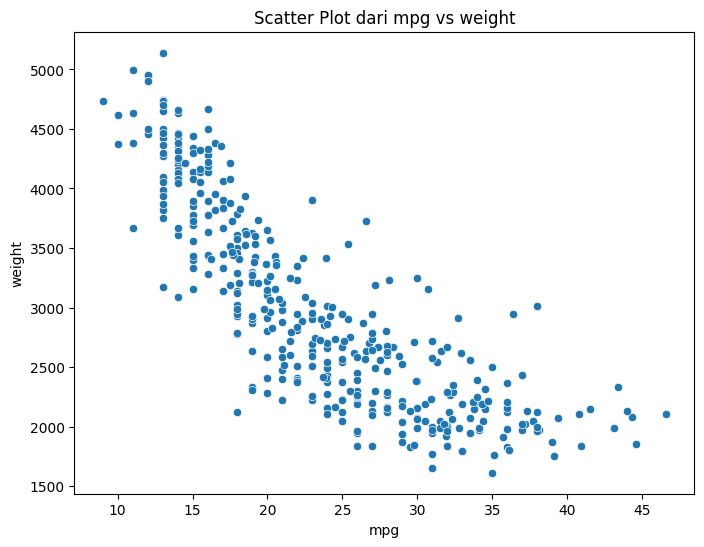

Korelasi antara mpg dan weight: -0.8317409332443352



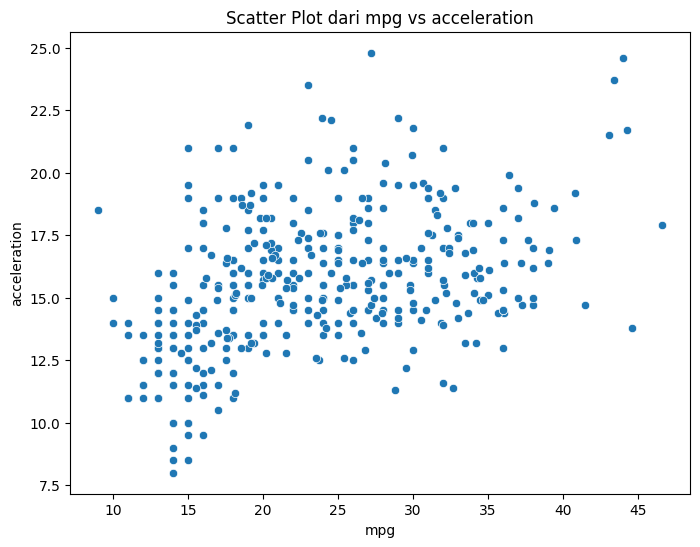

Korelasi antara mpg dan acceleration: 0.42028891210165065



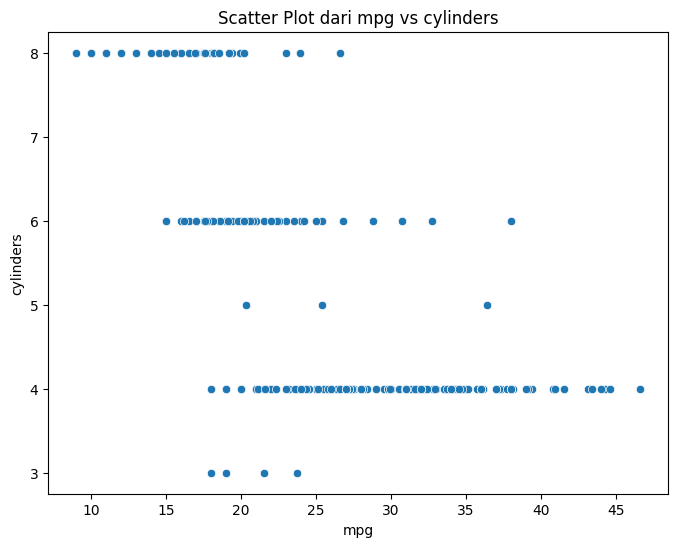

Korelasi antara mpg dan cylinders: -0.7753962854205542



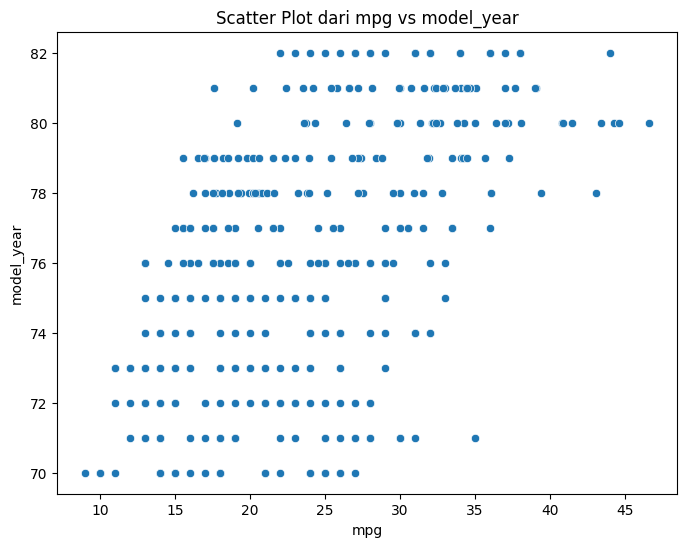

Korelasi antara mpg dan model_year: 0.5792671330833096



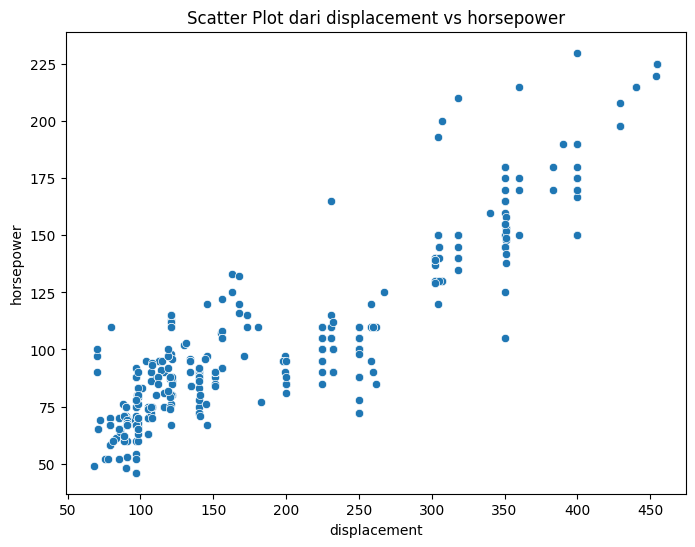

Korelasi antara displacement dan horsepower: 0.8972570018434685



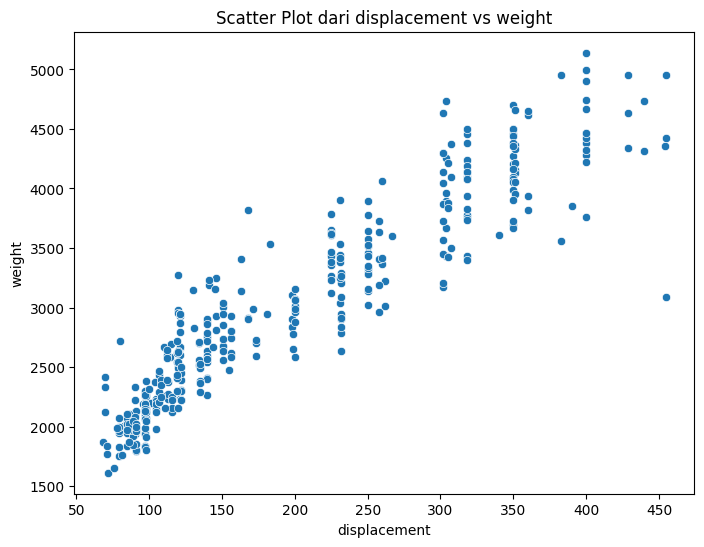

Korelasi antara displacement dan weight: 0.9328241468416342



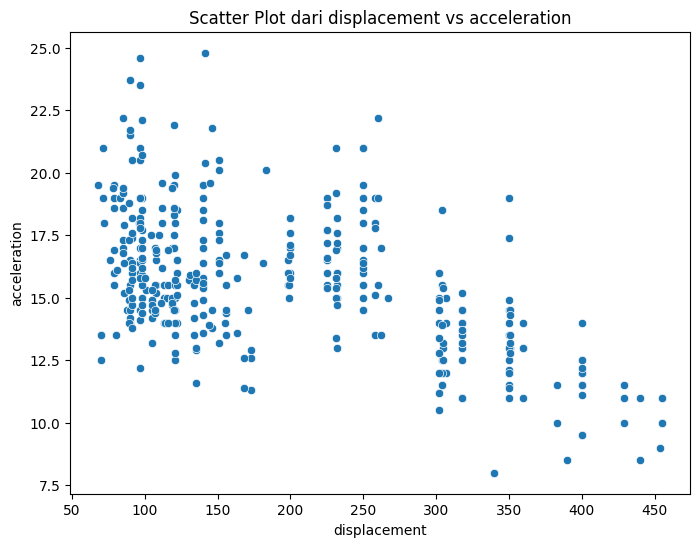

Korelasi antara displacement dan acceleration: -0.5436840835009296



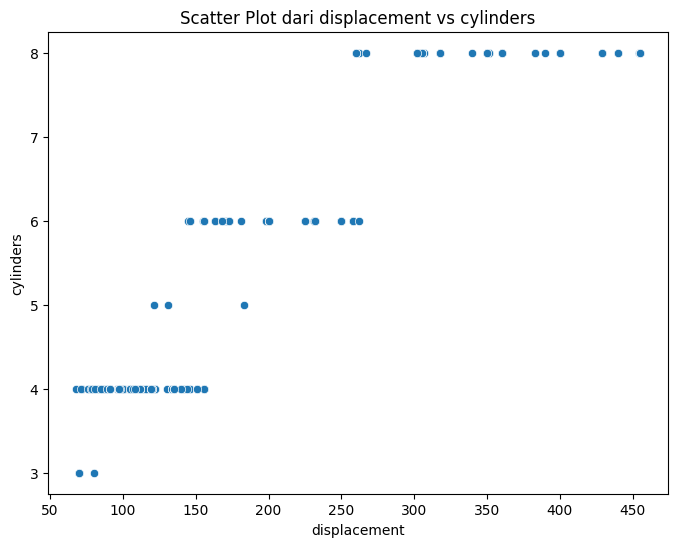

Korelasi antara displacement dan cylinders: 0.9507213901392413



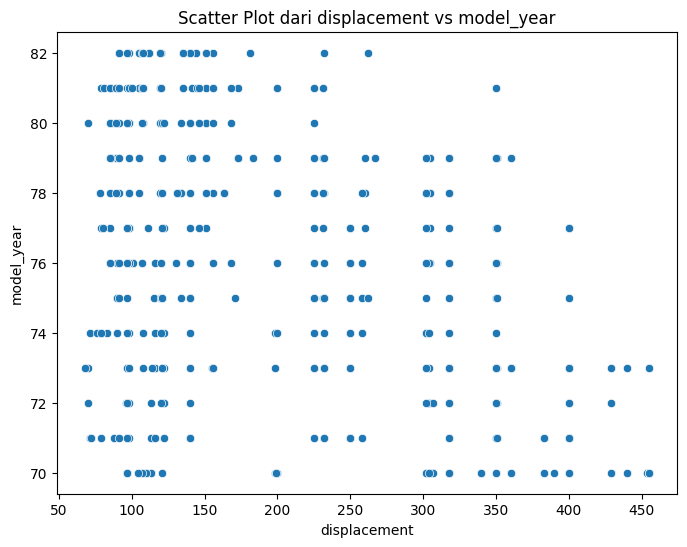

Korelasi antara displacement dan model_year: -0.37016416107932415



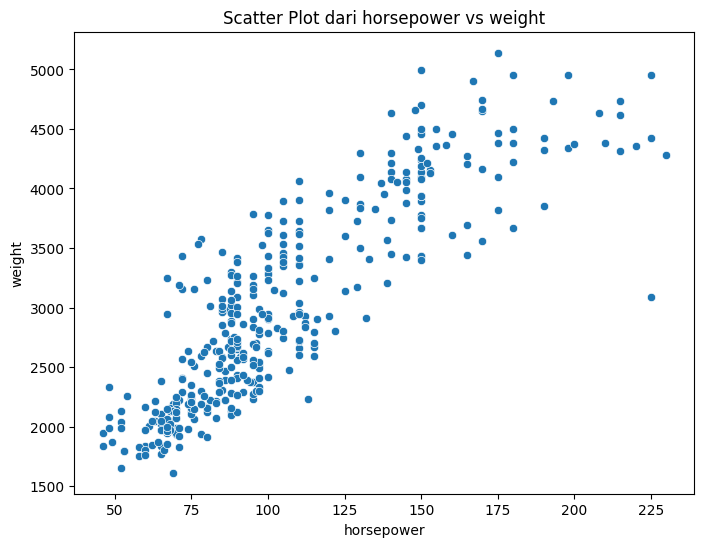

Korelasi antara horsepower dan weight: 0.864537737574144



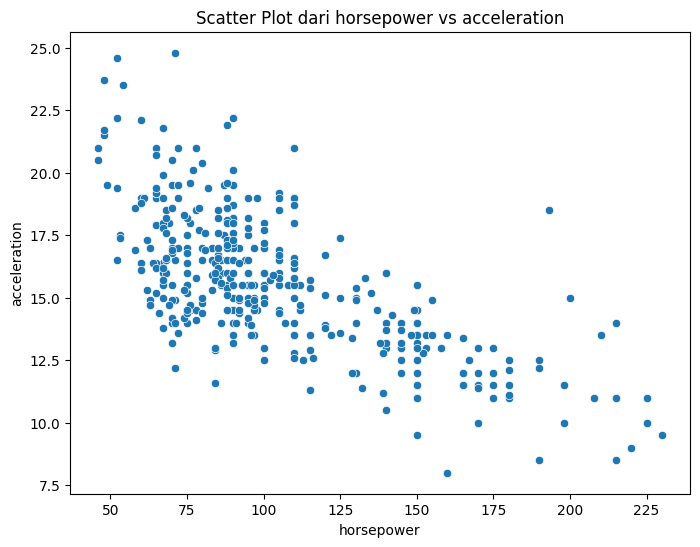

Korelasi antara horsepower dan acceleration: -0.6891955103342359



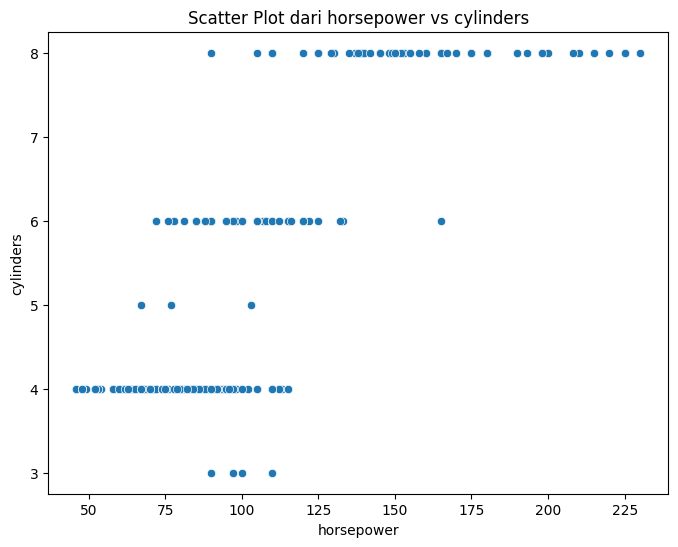

Korelasi antara horsepower dan cylinders: 0.8429833569186554



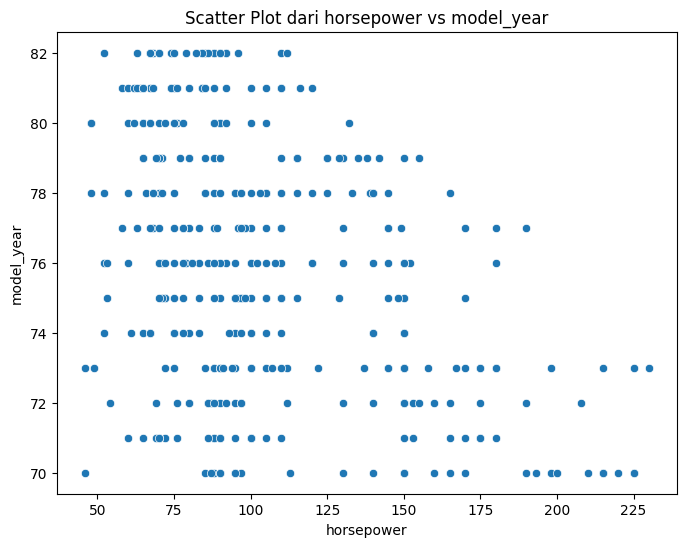

Korelasi antara horsepower dan model_year: -0.4163614770999883



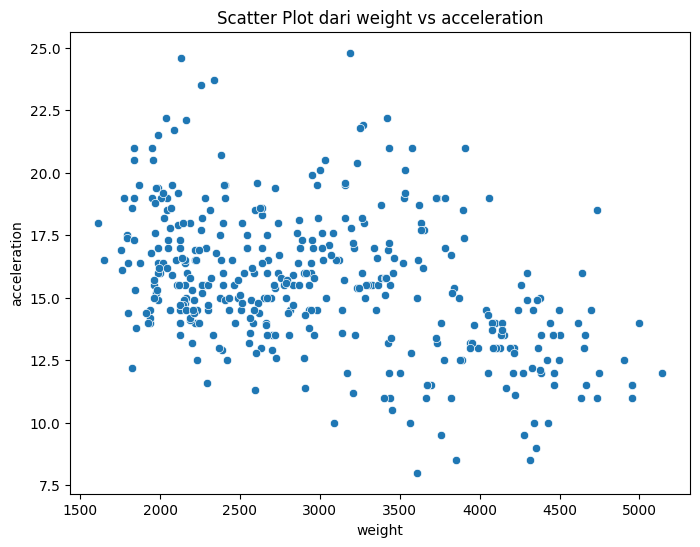

Korelasi antara weight dan acceleration: -0.4174573199403932



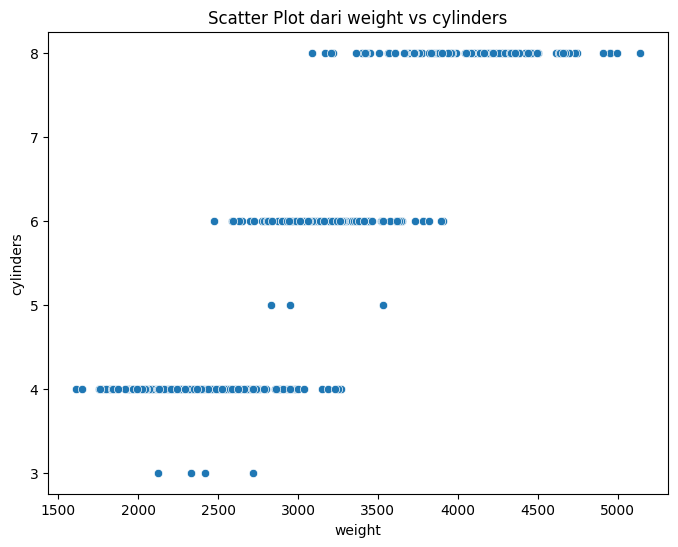

Korelasi antara weight dan cylinders: 0.8960167954533942



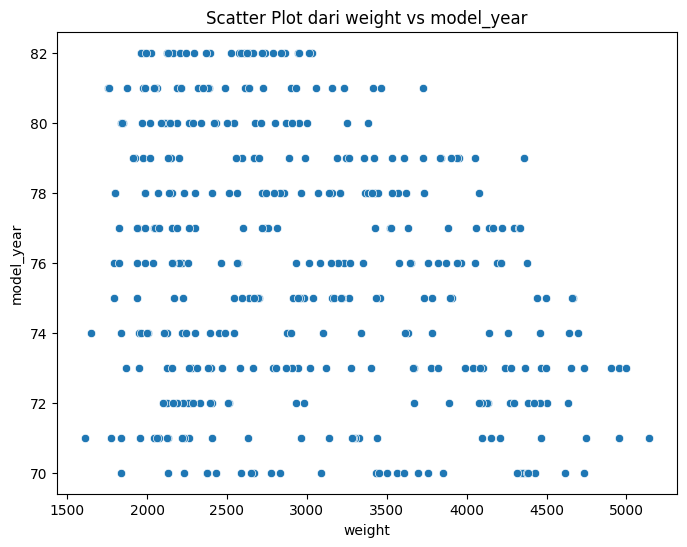

Korelasi antara weight dan model_year: -0.3065643342832895



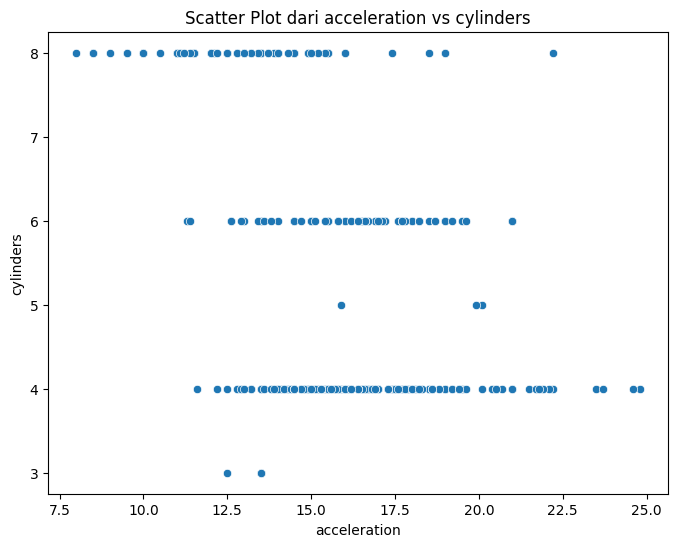

Korelasi antara acceleration dan cylinders: -0.5054194890521763



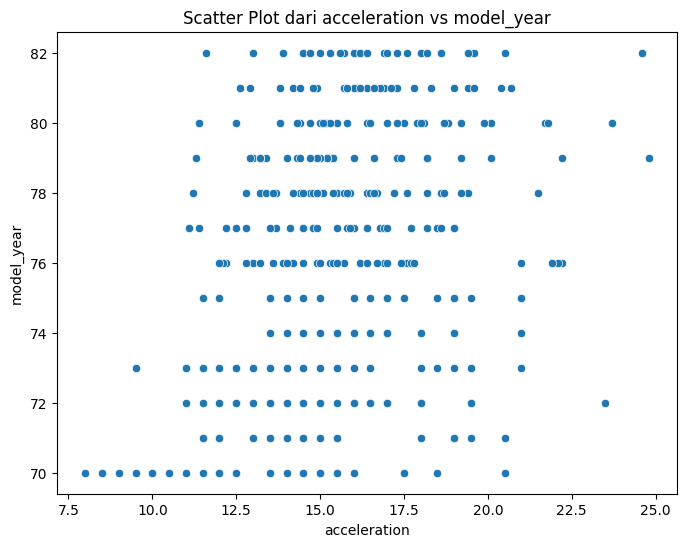

Korelasi antara acceleration dan model_year: 0.2881369542994897



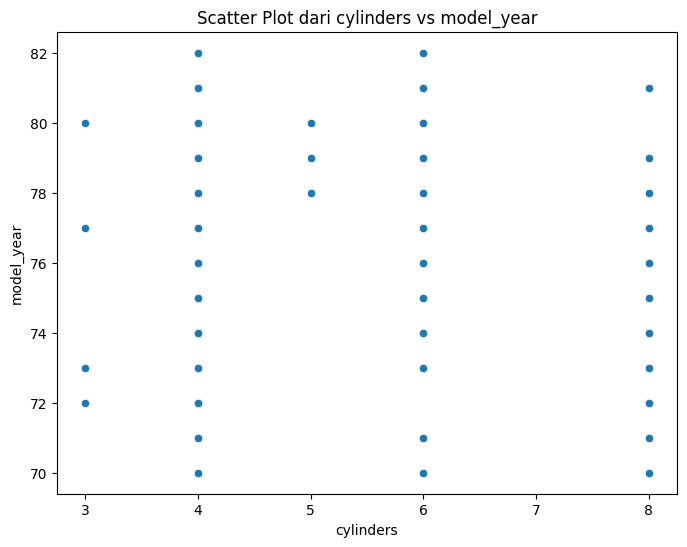

Korelasi antara cylinders dan model_year: -0.34874579661359373



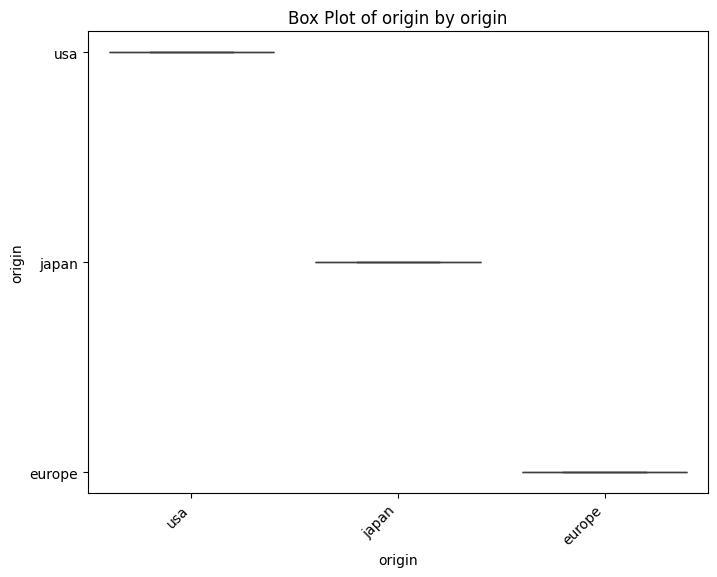

Data yang dikelompokkan untuk origin berdasarkan origin:
       count unique     top freq
origin                          
europe    70      1  europe   70
japan     79      1   japan   79
usa      249      1     usa  249



In [ ]:
# Bivariate Analysis untuk kolom numerik
kolom_numerik = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'model_year']

for i in range(len(kolom_numerik)):
    for j in range(i + 1, len(kolom_numerik)):
        col1 = kolom_numerik[i]
        col2 = kolom_numerik[j]
        # Scatterplot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter Plot dari {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

        correlation = df[col1].corr(df[col2])
        print(f'Korelasi antara {col1} dan {col2}: {correlation}\n')

# Bivariate Analysis untuk kolom kategorik
kolom_kategorik = ['origin']

for cat_col in kolom_kategorik:
    for num_col in kolom_kategorik:
        # Boxplot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.show()

        print(f'Data yang dikelompokkan untuk {num_col} berdasarkan {cat_col}:\n{df.groupby(cat_col)[num_col].describe()}\n')

# Bivariate Analysis untuk kombinasi kategorik-kategorik
for i in range(len(kolom_kategorik)):
    for j in range(i + 1, len(kolom_kategorik)):
        cat_col1 = kolom_kategorik[i]
        cat_col2 = kolom_kategorik[j]

        crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
        print(f'Tabulasi silang antara {cat_col1} dan {cat_col2}:\n{crosstab}\n')

        plt.figure(figsize=(8, 6))
        sns.heatmap(crosstab, annot=True, cmap='Blues')
        plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
        plt.xlabel(cat_col2)
        plt.ylabel(cat_col1)
        plt.show()

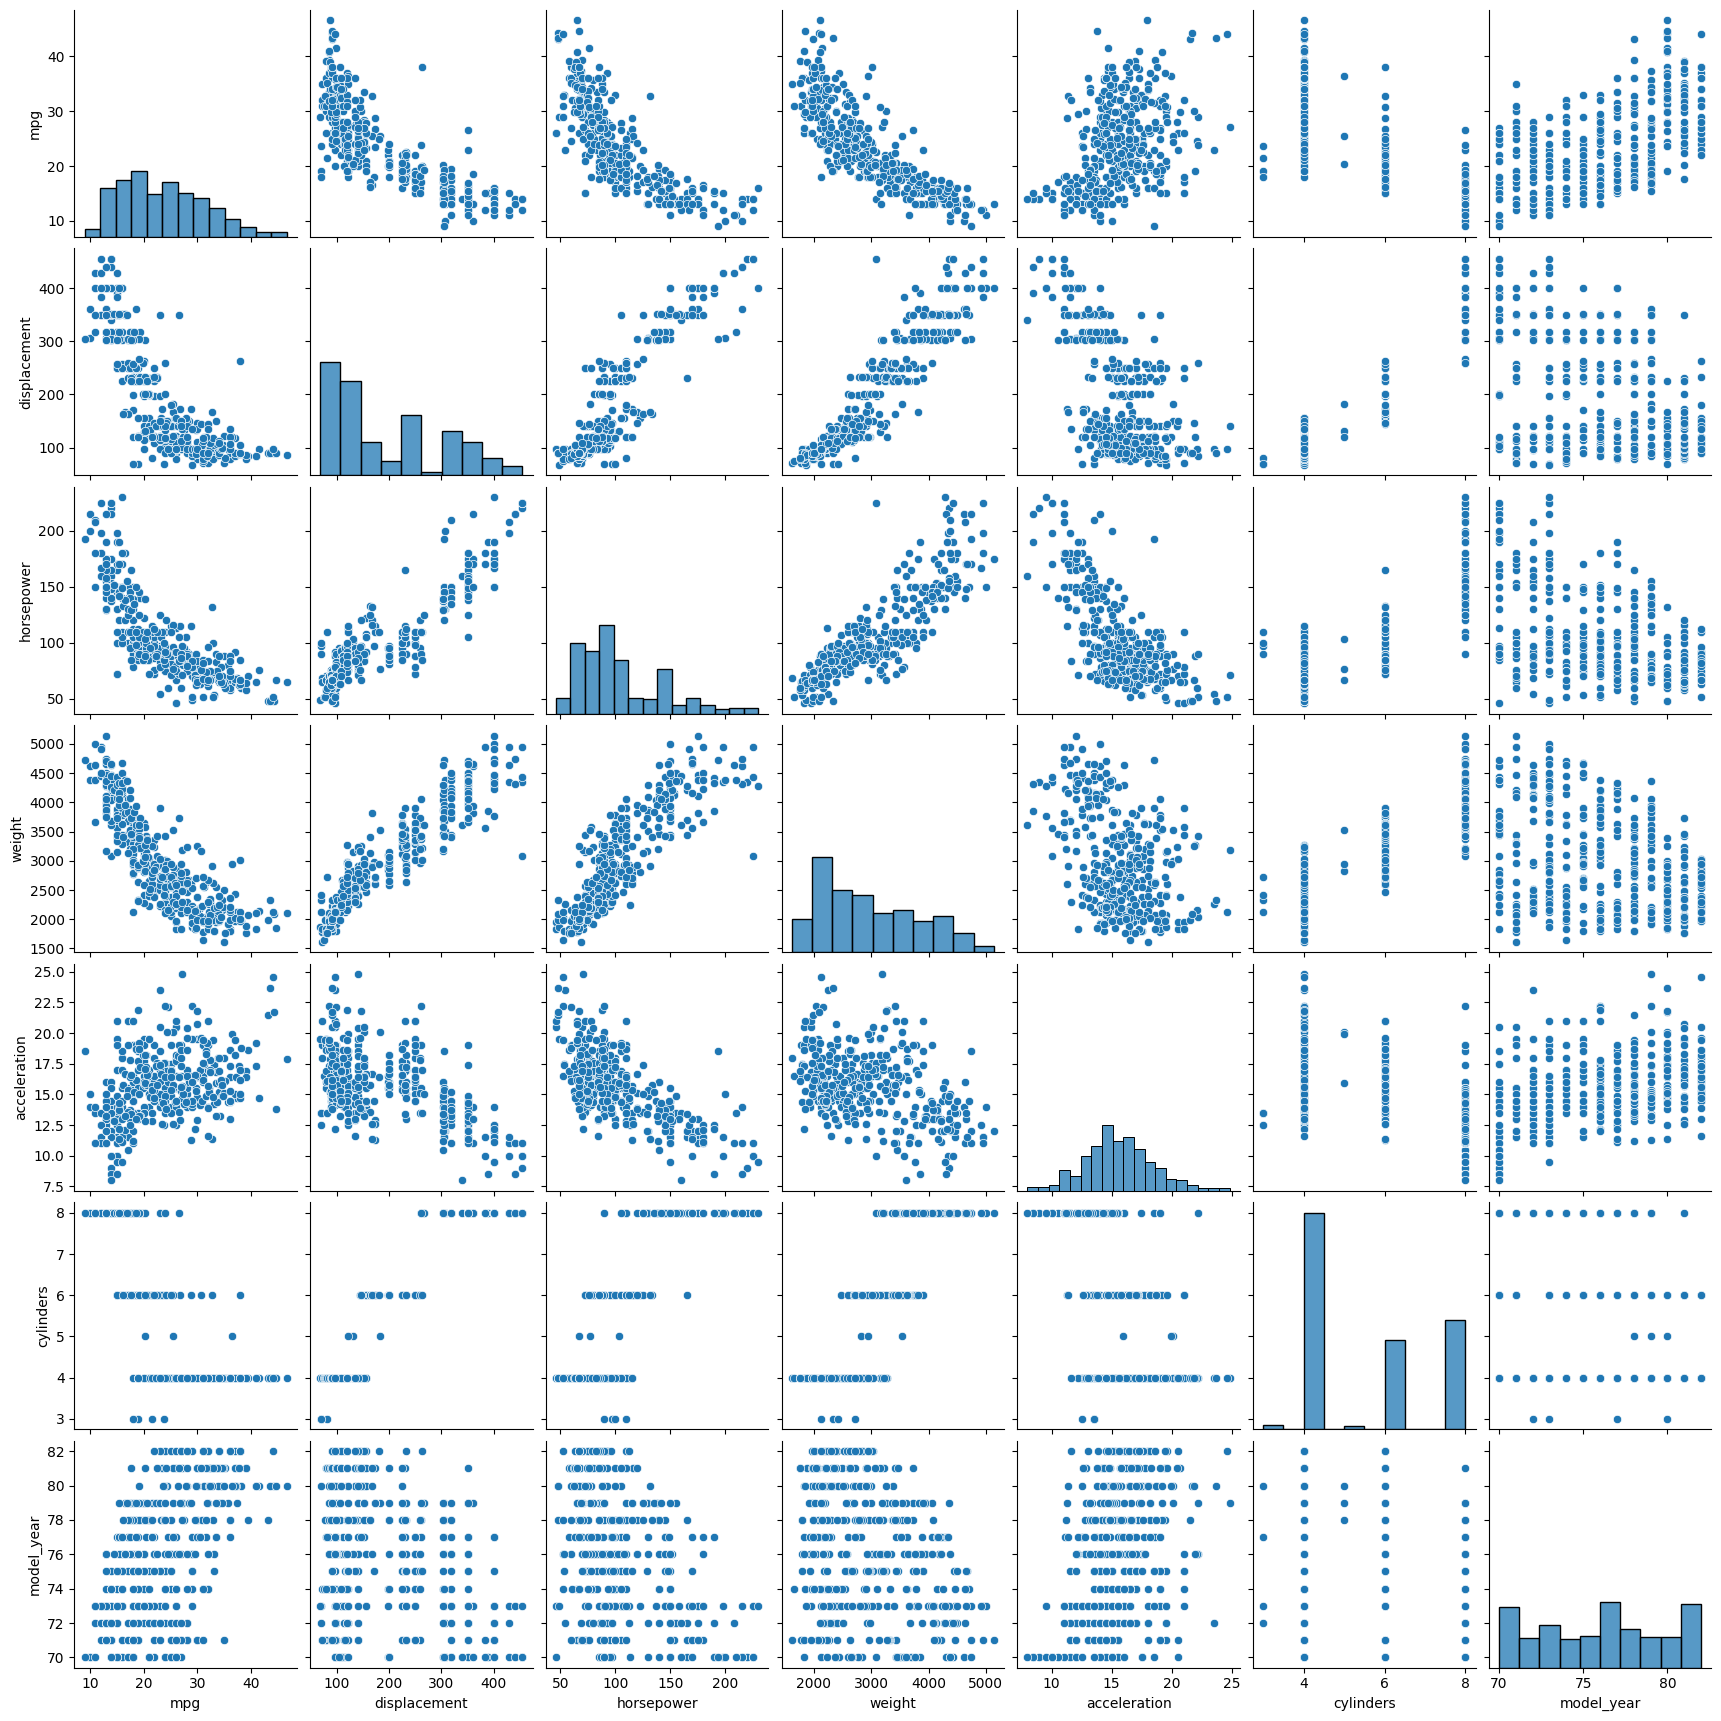

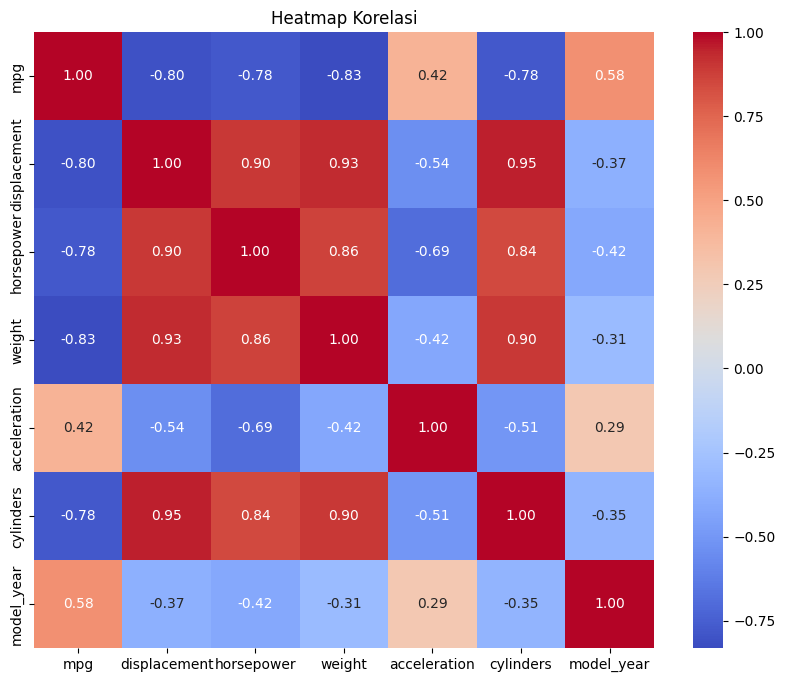

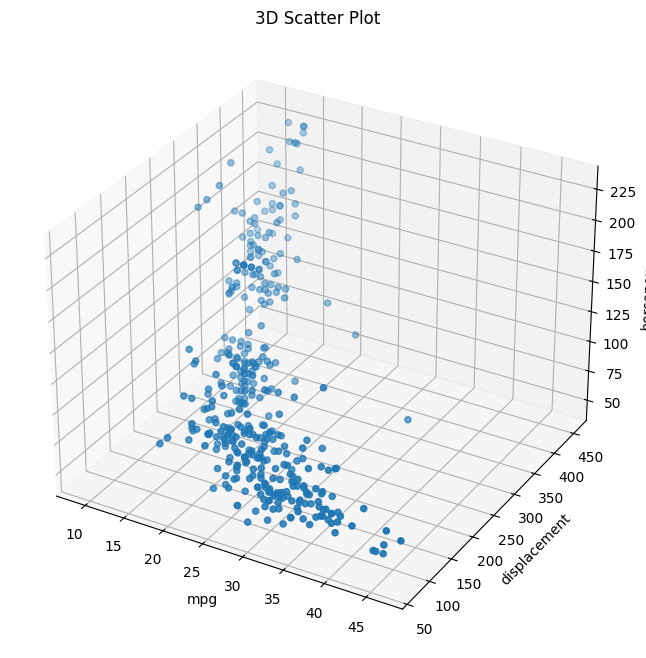

In [ ]:
# Multivarite Analysis dengan pairplot
kolom_numerik = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'model_year']
sns.pairplot(df[kolom_numerik])
plt.show()

# Multivariate Analysis dengan heatmap korelasi
correlation_matrix = df[kolom_numerik].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

# Multivariate Analysis dengan scatter plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['mpg'], df['displacement'], df['horsepower'])
ax.set_xlabel('mpg')
ax.set_ylabel('displacement')
ax.set_zlabel('horsepower')
plt.title('3D Scatter Plot')
plt.show()

## **DATA PRE-PROCESSING**
### **Data Cleaning**

#### **1. Identifikasi Mean-Median-Modus**

In [ ]:
kolom_numerik = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration','cylinders', 'model_year']

for column in kolom_numerik:
    mean = df[column].mean()
    median = df[column].median()
    modus = df[column].mode()[0]
    print(f'Mean {column}: {mean}')
    print(f'Median {column}: {median}')
    print(f'Modus {column}: {modus}')

kolom_kategorik = ['origin']

for column in kolom_kategorik:
    modus = df[column].mode()[0]
    print(f'Modus {column}: {modus}')

Mean mpg: 23.514572864321607
Median mpg: 23.0
Modus mpg: 13.0
Mean displacement: 193.42587939698493
Median displacement: 148.5
Modus displacement: 97.0
Mean horsepower: 104.46938775510205
Median horsepower: 93.5
Modus horsepower: 150.0
Mean weight: 2970.424623115578
Median weight: 2803.5
Modus weight: 1985
Mean acceleration: 15.568090452261307
Median acceleration: 15.5
Modus acceleration: 14.5
Mean cylinders: 5.454773869346734
Median cylinders: 4.0
Modus cylinders: 4
Mean model_year: 76.01005025125629
Median model_year: 76.0
Modus model_year: 73
Modus origin: usa


#### **2. Handling dirty data**

In [ ]:
df2 = df.copy()

In [ ]:
# Menangani missing values pada kolom horsepower dengan median
df2 = df2.fillna(df2['horsepower'].median())
df2

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
# Memeriksa kembali apakah masih ada missing valuenya atau tidak
df2.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0


In [ ]:
# Menangani outlier
import numpy as np

def Mengatasi_Outlier(df, column):
  Q1 = df2[column].quantile(0.25)
  Q3 = df2[column].quantile(0.75)
  IQR = Q3 - Q1
  batas_bawah = Q1 - 1.5 * IQR
  batas_atas = Q3 + 1.5 * IQR

  df2[column] = np.clip(df2[column], batas_bawah, batas_atas)

kolom_yang_ditangani = ['displacement', 'horsepower', 'weight', 'acceleration']

all_outliers = pd.DataFrame()

for column in kolom_yang_ditangani:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers = df2[(df2[column] < batas_bawah) | (df2[column] > batas_atas)]
    all_outliers = pd.concat([all_outliers, outliers])

    Mengatasi_Outlier(df2, column)
    print(f"Outlier pada kolom {column} telah ditangani.")

print(f"Jumlah Outlier: {all_outliers.shape[0]}")

Outlier pada kolom displacement telah ditangani.
Outlier pada kolom horsepower telah ditangani.
Outlier pada kolom weight telah ditangani.
Outlier pada kolom acceleration telah ditangani.
Jumlah Outlier: 18


#### **3. Feature engineering**

**Feature Creation dan encoding**

In [ ]:
df2['horsepower'] = pd.to_numeric(df2['horsepower'], errors='coerce')

In [ ]:
# Ubah jadi tipe kategorikal
df2['cylinders'] = df2['cylinders'].astype('category')

# One-hot encoding (kalau perlu)
df2 = pd.get_dummies(df2, columns=['cylinders','origin'], drop_first=True)
df2

,name,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_japan,origin_usa
0,chevrolet chevelle malibu,18.0,307.0,130.0,3504,12.0,70,False,False,False,True,False,True
1,buick skylark 320,15.0,350.0,165.0,3693,11.5,70,False,False,False,True,False,True
2,plymouth satellite,18.0,318.0,150.0,3436,11.0,70,False,False,False,True,False,True
3,amc rebel sst,16.0,304.0,150.0,3433,12.0,70,False,False,False,True,False,True
4,ford torino,17.0,302.0,140.0,3449,10.5,70,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,140.0,86.0,2790,15.6,82,True,False,False,False,False,True
394,vw pickup,44.0,97.0,52.0,2130,22.2,82,True,False,False,False,False,False
395,dodge rampage,32.0,135.0,84.0,2295,11.6,82,True,False,False,False,False,True
396,ford ranger,28.0,120.0,79.0,2625,18.6,82,True,False,False,False,False,True


In [ ]:
df2['power_to_weight'] = df2['horsepower'] / df2['weight']
df2['accel_per_horsepower'] = df2['acceleration'] / df2['horsepower']
df2['accel_per_weight'] = df2['acceleration'] / df2['weight']

**Transformasi Data**

Skewness sebelum log transform:
mpg             0.457066
displacement    0.719645
horsepower      0.935495
weight          0.531063
acceleration    0.163862
dtype: float64


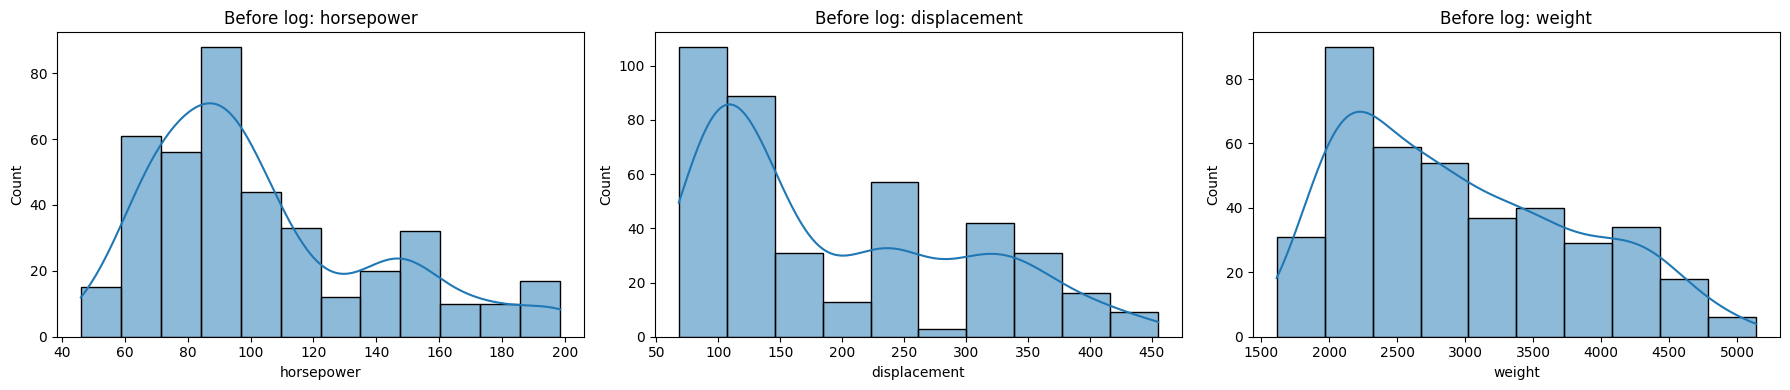

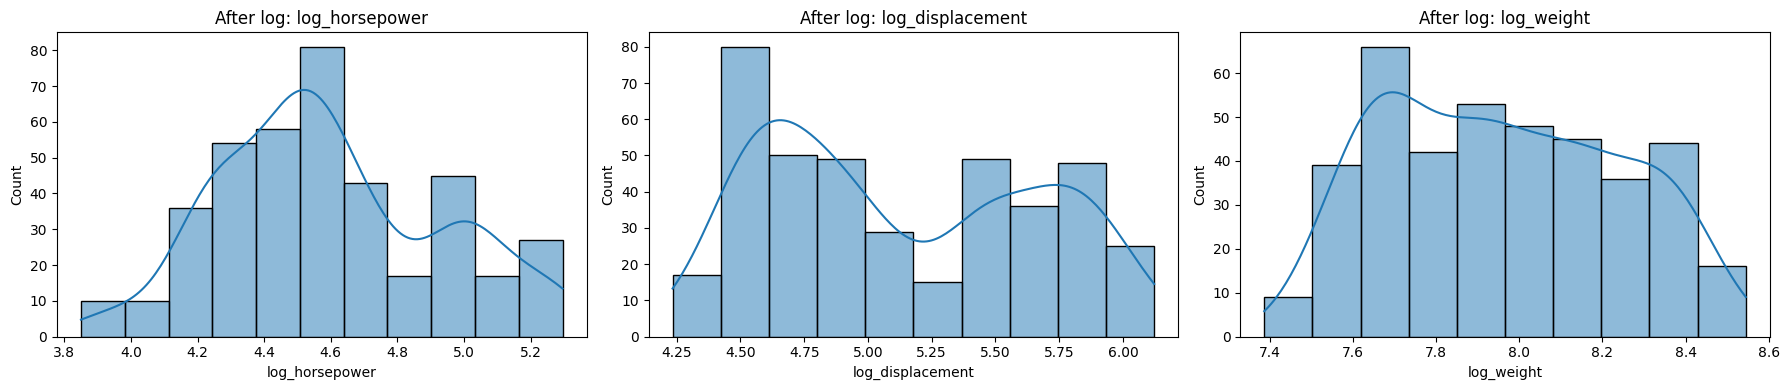


Skewness setelah log transform:
log_horsepower      0.314640
log_displacement    0.228886
log_weight          0.156435
dtype: float64


In [ ]:
numerical_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print("Skewness sebelum log transform:")
print(df2[numerical_cols].dropna().skew())

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, col in enumerate(['horsepower', 'displacement', 'weight']):
    sns.histplot(df2[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Before log: {col}')
plt.tight_layout()
plt.show()

df2['log_horsepower'] = np.log1p(df2['horsepower'])
df2['log_displacement'] = np.log1p(df2['displacement'])
df2['log_weight'] = np.log1p(df2['weight'])

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, col in enumerate(['log_horsepower', 'log_displacement', 'log_weight']):
    sns.histplot(df2[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'After log: {col}')
plt.tight_layout()
plt.show()

print("\nSkewness setelah log transform:")
print(df2[['log_horsepower', 'log_displacement', 'log_weight']].dropna().skew())

### **Basic Statistic**

In [ ]:
df2.describe()

,mpg,displacement,horsepower,weight,acceleration,model_year,power_to_weight,accel_per_horsepower,accel_per_weight,log_horsepower,log_displacement,log_weight
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,103.790201,2970.424623,15.552010,76.010050,0.034771,0.173828,0.005764,4.595434,5.129939,7.957254
std,7.815984,104.269838,36.770468,846.841774,2.693089,3.697627,0.005654,0.078372,0.002106,0.331953,0.528088,0.280566
min,9.000000,68.000000,46.000000,1613.000000,8.800000,70.000000,0.020557,0.044332,0.002041,3.850148,4.234107,7.386471
25%,17.500000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.030851,0.114351,0.004225,4.343805,4.656330,7.707400
50%,23.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,0.034285,0.170795,0.005618,4.548600,5.007157,7.938980
75%,29.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,0.038168,0.212997,0.007076,4.836282,5.572154,8.191186
max,46.600000,455.000000,198.500000,5140.000000,22.200000,82.000000,0.064323,0.462500,0.011438,5.295814,6.122493,8.545003


## **DATA MODELING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

X = df2.drop(['name', 'mpg'], axis=1)
y = df2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


numerical_cols = df2.select_dtypes(include=['number']).columns

scaler = RobustScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")

Train R²: 0.8737
Test R²: 0.8890


## **MODEL EVALUASI**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

print(f"Cross-Validated RMSE (mean): {rmse_scores.mean():.4f}")
print(f"Cross-Validated RMSE (std): {rmse_scores.std():.4f}")

Cross-Validated RMSE (mean): 3.3519
Cross-Validated RMSE (std): 0.8785


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 5.9687
RMSE: 2.4431
R² Score: 0.8890
MAE: 1.7940


In [ ]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² Train: {r2_train:.4f}")
print(f"R² Test : {r2_test:.4f}")

# Interpretasi
if r2_train < 0.6 and r2_test < 0.6:
    print("Kemungkinan model underfitting (terlalu sederhana).")
elif r2_train > 0.9 and r2_test < 0.6:
    print("Kemungkinan model overfitting (terlalu kompleks).")
else:
    print("Model seimbang antara training dan testing.")

R² Train: 0.8737
R² Test : 0.8890
Model seimbang antara training dan testing.


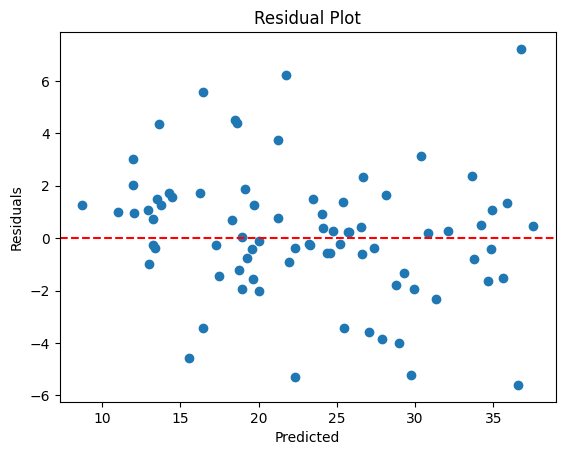

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()